In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import sklearn
import scipy

In [2]:
def correlation_test(x, y, alpha, test='pearson'):
    '''
    This function prints out the correlation and p values and returns the hypothesis testing results for two variables x and y.
    '''
    if test=='pearson':
        correlation, p = scipy.stats.pearsonr(x, y)
    elif test=='spearman': 
        correlation, p = scipy.stats.spearmanr(x, y)
    else:
        print('Unknown correlation test')
    print(test,'correlation betweeen the input variables is',"{:.2f}".format(correlation),'with p value',"{:.2f}".format(p))
    if p <= alpha:
        print('Reject null hypothesis. The linear correlation is statistically significant')
    else:
        print('Accept null hypothesis. The linear correlation is statistically insignificant')
    return

In [3]:
def plot_linear_regression(x, y):
    '''
    This function plots the linear regression line of variable x and y.
    '''
    slope, intercept, r, p, stderr = scipy.stats.linregress(x,y)
    line_label = f'Regression line: y={intercept:.2f}+{slope:.2f}x'
    plt.plot(x, y, linewidth=0, marker='o',color='green',label='input data')
    plt.plot(x, intercept+slope*x, label=line_label)
    plt.legend()
    return slope, intercept

In [4]:
def linear_outliers(x,y,num):
    '''
    This function plots and highlights the outliers from the regression line and return lists of x,y with outliers removed.
    '''
    slope, intercept = plot_linear_regression(x, y)
    y_line = intercept+slope*x
    err = []
    for y_i, y_line_i in zip(y, y_line):
        err.append(abs(y_line_i-y_i))
    
    indexes = []
    for outlier_num in range(num):
        max_index = err.index(np.max(err))
        indexes.append(max_index)
        plt.plot(x[max_index], y[max_index],marker='o', color='r',label='outliers') 
        print('Detect outlier at position','x=',x[max_index],'y=',y[max_index])
        err.remove(np.max(err))

    # Create new x,y lists that don't have the outliers
    x_no_outliers = x
    y_no_outliers = y
    for item, index in enumerate(indexes):
        x_no_outliers[item]=np.nan
        y_no_outliers[item]=np.nan
    x_no_outliers = [x_i for x_i in x_no_outliers if np.isnan(x_i) == False]
    y_no_outliers = [y_i for y_i in y_no_outliers if np.isnan(y_i) == False]
    
    return x_no_outliers, y_no_outliers

## Load Dataframe

In [5]:
df = pd.read_csv('full_parameter_dataframe.csv')

In [6]:
df

,Unnamed: 0,Paper #,Set,Cathode \nThickness [µm],Anode \nThickness [µm],Cathode 3D \nCharateristic Length [µm],Anode 3D \nCharateristic\nLength [µm],n,tau,Q,SA/V [1/µm],SA gain,General Overall Architecture,General Cathode Architecture,General Anode Architecture,1C current Density [mA/cm^2],Cathode Material,Anode Material,charateristic_length
0,0,1,1,500,NaN,100.0,NaN,1.302510,0.485641,106.109051,0.0296,14.80,2.5D,Solid Column,1D,1.78,LiFePO4,Lithium,100.0
1,1,1,1,500,NaN,100.0,NaN,1.171664,0.487356,105.112499,0.0296,14.80,2.5D,Solid Column,1D,1.78,LiFePO4,Lithium,100.0
2,11,17,1,220,NaN,2000.0,NaN,2.223919,0.947268,153.778365,0.0051,1.10,2.5D,Electrolyte channel,1D,NaN,LiCoO2,Lithium,2000.0
3,12,17,2,220,NaN,180.0,NaN,2.244143,0.529848,151.124828,0.0102,2.30,2.5D,Electrolyte channel,1D,NaN,LiCoO2,Lithium,180.0
4,13,17,3,220,NaN,17.0,NaN,1.884653,0.270364,152.606465,0.0694,15.30,2.5D,Electrolyte channel,1D,NaN,LiCoO2,Lithium,17.0
5,14,19,1,150,NaN,70.0,70.0,0.115141,0.000003,196.646059,0.0200,3.00,2.5D,1D,Electrolyte channel,N/R,Li4Ti5O12,Lithium,70.0
6,15,23,1,69,70.0,NaN,60.0,4.669976,0.092302,127.716693,0.0267,1.90,2.5D,1D,Electrolyte channel,N/R,NMC (1/11),Graphite,60.0
7,16,23,2,69,70.0,NaN,60.0,4.526725,0.095259,127.906362,0.0267,1.90,2.5D,1D,Electrolyte channel,N/R,NMC (1/11),Graphite,60.0
8,17,27,1,15,15.0,15.0,15.0,2.421715,0.034467,135.232037,0.0222,11.42,Interdigitated,Int plate,Int plate,0.135,LiCoO2,Li4Ti5O12,15.0
9,18,31,1,6,NaN,0.5,NaN,2.363981,0.109881,306.757639,3.0100,18.10,2.5D,Coated Network,1D,N/R,V2O5,Lithium,0.5


## Pearson Correlation Testing

In [7]:
# Set variables
n = df['n'].values
tau = df['tau'].values
SA2V = df['SA/V [1/µm]'].values
SAgain = df['SA gain'].values
L = df['charateristic_length'].values

In [8]:
# Pearson correlation
correlation_test(n,SA2V,0.05)
correlation_test(tau,SA2V,0.05)
correlation_test(tau,SAgain,0.05)
correlation_test(tau,L,0.05)

pearson correlation betweeen the input variables is -0.12 with p value 0.72
Accept null hypothesis. The linear correlation is statistically insignificant
pearson correlation betweeen the input variables is -0.31 with p value 0.35
Accept null hypothesis. The linear correlation is statistically insignificant
pearson correlation betweeen the input variables is -0.24 with p value 0.47
Accept null hypothesis. The linear correlation is statistically insignificant
pearson correlation betweeen the input variables is 0.79 with p value 0.00
Reject null hypothesis. The linear correlation is statistically significant


## Identify and Remove potential Outliers

In [9]:
# Remove outlier
df_no_outlier = df.drop(index=5)
df_no_outlier

,Unnamed: 0,Paper #,Set,Cathode \nThickness [µm],Anode \nThickness [µm],Cathode 3D \nCharateristic Length [µm],Anode 3D \nCharateristic\nLength [µm],n,tau,Q,SA/V [1/µm],SA gain,General Overall Architecture,General Cathode Architecture,General Anode Architecture,1C current Density [mA/cm^2],Cathode Material,Anode Material,charateristic_length
0,0,1,1,500,NaN,100.0,NaN,1.302510,0.485641,106.109051,0.0296,14.80,2.5D,Solid Column,1D,1.78,LiFePO4,Lithium,100.0
1,1,1,1,500,NaN,100.0,NaN,1.171664,0.487356,105.112499,0.0296,14.80,2.5D,Solid Column,1D,1.78,LiFePO4,Lithium,100.0
2,11,17,1,220,NaN,2000.0,NaN,2.223919,0.947268,153.778365,0.0051,1.10,2.5D,Electrolyte channel,1D,NaN,LiCoO2,Lithium,2000.0
3,12,17,2,220,NaN,180.0,NaN,2.244143,0.529848,151.124828,0.0102,2.30,2.5D,Electrolyte channel,1D,NaN,LiCoO2,Lithium,180.0
4,13,17,3,220,NaN,17.0,NaN,1.884653,0.270364,152.606465,0.0694,15.30,2.5D,Electrolyte channel,1D,NaN,LiCoO2,Lithium,17.0
6,15,23,1,69,70.0,NaN,60.0,4.669976,0.092302,127.716693,0.0267,1.90,2.5D,1D,Electrolyte channel,N/R,NMC (1/11),Graphite,60.0
7,16,23,2,69,70.0,NaN,60.0,4.526725,0.095259,127.906362,0.0267,1.90,2.5D,1D,Electrolyte channel,N/R,NMC (1/11),Graphite,60.0
8,17,27,1,15,15.0,15.0,15.0,2.421715,0.034467,135.232037,0.0222,11.42,Interdigitated,Int plate,Int plate,0.135,LiCoO2,Li4Ti5O12,15.0
9,18,31,1,6,NaN,0.5,NaN,2.363981,0.109881,306.757639,3.0100,18.10,2.5D,Coated Network,1D,N/R,V2O5,Lithium,0.5
10,19,31,2,12,NaN,0.5,NaN,1.402870,0.094515,313.641256,3.1800,38.20,2.5D,Coated Network,1D,N/R,V2O5,Lithium,0.5


In [10]:
# Set variables
n_new = df_no_outlier['n'].values
tau_new = df_no_outlier['tau'].values
SA2V_new = df_no_outlier['SA/V [1/µm]'].values
SAgain_new = df_no_outlier['SA gain'].values
L_new = df_no_outlier['charateristic_length'].values

## Pearson Correlation Testing without Outlier

In [11]:
# Pearson correlation
correlation_test(n_new,SA2V_new,0.05)
correlation_test(tau_new,SA2V_new,0.05)
correlation_test(tau_new,SAgain_new,0.05)
correlation_test(tau_new,L_new,0.05)

pearson correlation betweeen the input variables is -0.24 with p value 0.51
Accept null hypothesis. The linear correlation is statistically insignificant
pearson correlation betweeen the input variables is -0.39 with p value 0.27
Accept null hypothesis. The linear correlation is statistically insignificant
pearson correlation betweeen the input variables is -0.35 with p value 0.32
Accept null hypothesis. The linear correlation is statistically insignificant
pearson correlation betweeen the input variables is 0.80 with p value 0.01
Reject null hypothesis. The linear correlation is statistically significant


## Spearman Correlation
Unlike Pearson correlation, Spearman correlation does not require the input sample to be normally distributed.

In [12]:
# Spearman correlation
correlation_test(n_new,SA2V_new,0.05,test='spearman')
correlation_test(tau_new,SA2V_new,0.05,test='spearman')
correlation_test(tau_new,SAgain_new,0.05,test='spearman')
correlation_test(tau_new,L_new,0.05,test='spearman')


spearman correlation betweeen the input variables is -0.38 with p value 0.27
Accept null hypothesis. The linear correlation is statistically insignificant
spearman correlation betweeen the input variables is -0.29 with p value 0.41
Accept null hypothesis. The linear correlation is statistically insignificant
spearman correlation betweeen the input variables is -0.20 with p value 0.59
Accept null hypothesis. The linear correlation is statistically insignificant
spearman correlation betweeen the input variables is 0.77 with p value 0.01
Reject null hypothesis. The linear correlation is statistically significant


## Calculate and plot linear regression line

(0.0003822041646113695, 0.21787795405231086)

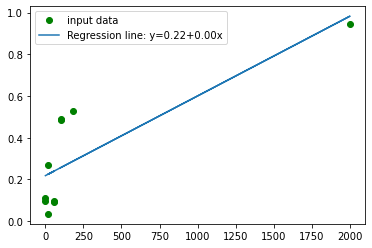

In [13]:
plot_linear_regression(L_new,tau_new)

## Detect and remove a specified number of outliers from linear fit

Detect outlier at position x= 180.0 y= 0.5298482549704991
Detect outlier at position x= 100.0 y= 0.4873564601100946
Detect outlier at position x= 100.0 y= 0.4856405811949644
Detect outlier at position x= 17.0 y= 0.2703644548657798


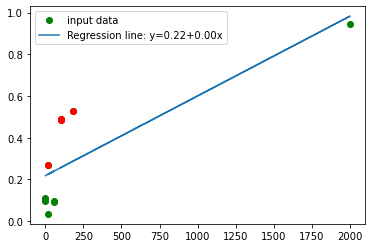

In [14]:
x,y = linear_outliers(L_new,tau_new,4)